# Sample Workflow

Let's think about what we need to do when approaching any machine learning competition/problem. Like we talked about during the slides, any problem involving some sort of prediction task creates the possibility for us to apply machine learning to it.

1) Determine your problem space. Do you have a classification problem, or a regression problem?

2) Determine what model you want to use (Always good to start off with simple models).

3) Load in and preprocess your dataset. Examine your database to see if there are any NULL or non-numeric values.

4) Split up your dataset into training and testing components.

5) Create your model. Depending on the libraries you are using, this could entail defining your function, your placeholders, the loss function, and the optimizer.

6) Train, evaluate, and iterate on your model!

7) Once you have a model that you've trained and that you're satisfied with, you can deploy it to a server! [Flask](http://flask.pocoo.org/) is often a good choice for serving ML models.

# Titanic Dataset

In this Notebook, we'll examine the classic Titanic Prediction problem that is hosted on [Kaggle](https://www.kaggle.com/c/titanic). The goal is to be able to predict who survived and who passed away during the Titanic tragedy, given information about the people involved.

## Input Data and Preprocessing

### Getting the Data

You can download the data from the Kaggle website. The direct link is [here](https://www.kaggle.com/c/titanic/data)

In [0]:
import pandas as pd

titanic_dataframe = pd.read_csv('https://raw.githubusercontent.com/uclaacm/learn.py-s19/master/session-5-data-mining/train.csv')

### Examining Data

[pandas](https://pandas.pydata.org) has a wide variety of functions for visualizing and examining data. Let's try some of them here:

In [2]:
# Get the first 5 training examples (data points)
titanic_dataframe.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# Print out all of the column names
titanic_dataframe.columns.tolist()

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

"Pclass" is the class of travel (1st, 2nd, or 3rd).
"SibSp" is the number of siblings/spouses the passenger has aboard.
"Parch" is the number of parents/children the passenger has aboard.
"Embarked" is the port that the passenger embarked from:
* C - Cherbourg
* S - Southampton
* Q - Queenstown



In [4]:
# Get statistics about each column with numerical data like minimum and maximum values
titanic_dataframe.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
# See the data types that we're working with
titanic_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f50a1286240>,
      dtype=object)

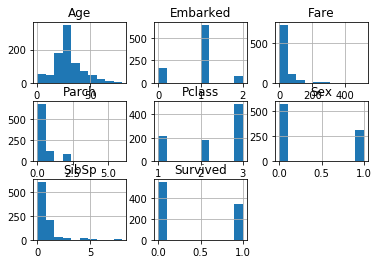

In [22]:
# Visualize the data using a histogram
titanic_dataframe.hist()

### Cleaning Data

This is one of the most important parts of any machine learning pipeline. We want to make sure that the inputs we feed into any machine learning model are are valid, non-null, and are numerical values.

The simplest way to start is by dropping values that are irrelevant to the problem. A person's name is not likely to affect whether or not they survived. Similarly, a passenger's ID number is also unlikely to affect this. What other features do you think are unimportant?

In [0]:
# Drop (delete) columns
titanic_dataframe.drop(['Cabin', 'PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)

Let's see what we're left with:

In [7]:
titanic_dataframe.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


The "Sex" and "Embarked" features are relevant for our model, but they are in a non-numerical form. Since there are a discrete number of possibilities for each (i.e. sex is "male" or "female"; embarked is "S", "C", or "Q") we can map each possibility to a different number. 

Just as we represented "Survived" as 1 and "Dead" as 0, we can represent "female" as 1 and "male" as 0. Similar logic applies to the "Embarked" feature.

In [0]:
# Map {'male', 'female'} to {0, 1}
mapping = {
    'female': 1,
    'male': 0
}
titanic_dataframe['Sex'] = titanic_dataframe['Sex'].map(mapping)

# Map {'C', 'S', 'Q'} to {0, 1, 2}
mapping = {
    'C': 0,
    'S': 1,
    'Q': 2
}
titanic_dataframe['Embarked'] = titanic_dataframe['Embarked'].map(mapping)

In [9]:
titanic_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null int64
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Embarked    889 non-null float64
dtypes: float64(3), int64(5)
memory usage: 55.8 KB


The last thing we notice is that our "Age" and "Embarked" are missing data; the rest of our features have 891 entries, but they only.have 714 and 889 respectively. Let's take a closer look at what's actually in "Embarked":

In [10]:
titanic_dataframe['Embarked'].unique()

array([ 1.,  0.,  2., nan])

Wherever "Age" and "Embarked" are missing data, pandas has placed a NaN. We can use a function to fill these NaNs with a value, but what value should we put? There are many different approaches, but for simplicity, we'll just fill them with the median value of the feature.

In [0]:
# Fill all NaNs in "Age" with the median age.
median_age = titanic_dataframe['Age'].median()
titanic_dataframe['Age'].fillna(median_age, inplace=True)

# Fill all NaNs in "Embarked" with the median port.
medianPort = titanic_dataframe['Embarked'].median()
titanic_dataframe['Embarked'].fillna(medianPort, inplace=True)

In [12]:
titanic_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null int64
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Embarked    891 non-null float64
dtypes: float64(3), int64(5)
memory usage: 55.8 KB


### Creating Training and Testing Matrices

Let's split our data into training and test samples. First, we're going to extract the necessary values from our dataframe and convert them into [numpy](https://www.numpy.org) matrices.

In [13]:
# Convert to numpy matrices
X = titanic_dataframe.iloc[:, 1:].values
y = titanic_dataframe['Survived'].values

print(X.shape)
print(y.shape)

(891, 7)
(891,)


Let's check our first training sample:

In [14]:
print(X[0])
print(y[0])

[ 3.    0.   22.    1.    0.    7.25  1.  ]
0


We'll now use a function from [sklearn](https://scikit-learn.org/stable/) to split our data 70-30 into training and test samples.

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(668, 7)
(223, 7)
(668,)
(223,)


## Training and Testing

Now that our data has been cleaned, pre-processed, and split into training/testing data, we can finally train our model.

### Create the Model

We'll again use the scikit-learn library to import a logistic regression model.

In [0]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='lbfgs', max_iter=1000)

### Train the model

In [17]:
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=1000, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

### Test/Evaluate the model

We'll evaluate our model using the [accuracy score metric](https://developers.google.com/machine-learning/crash-course/classification/accuracy), which is essentially just the fraction of test data samples that are classified correctly.

In [18]:
from sklearn.metrics import accuracy_score

predictions = model.predict(X_test)
print("The accuracy is:", accuracy_score(y_test, predictions))

The accuracy is: 0.8026905829596412


In [19]:
print(X_train[:10])
print(predictions[:10])

[[  2.       0.      28.       0.       1.      33.       1.    ]
 [  1.       0.      28.       0.       0.      27.7208   0.    ]
 [  3.       1.      28.       0.       0.       7.8792   2.    ]
 [  3.       0.      36.       0.       0.       7.4958   1.    ]
 [  1.       0.       0.92     1.       2.     151.55     1.    ]
 [  1.       0.      35.       0.       0.     512.3292   0.    ]
 [  3.       1.       5.       2.       1.      19.2583   0.    ]
 [  3.       0.      28.       0.       0.      56.4958   1.    ]
 [  1.       1.      24.       0.       0.      83.1583   0.    ]
 [  2.       0.      27.       0.       0.      13.       1.    ]]
[1 0 0 0 0 1 1 0 1 1]


We can also "make up" passengers and see what our model predicts.

In [20]:
import numpy as np

# Pclass, Sex, Age, SibSp, Parch, Fare, Embarked
passenger = np.array([[1, 1, 20, 2, 1, 75, 0]])
model.predict(passenger)

array([1])

## Evaluate

We can examine the weights of our logistic regression model to see what it "learned". Higher weights indicate that the associated feature is more important. Remember that more negative values make the sigmoid function tend to 0 (died), and more positive values make it tend to 1 (survived).

In [21]:
columns = titanic_dataframe.columns.tolist()[1:]
weights = ["%.6f" % x for x in model.coef_[0]]

for element in zip(columns, weights):
  print(element)

('Pclass', '-1.133423')
('Sex', '2.475661')
('Age', '-0.035387')
('SibSp', '-0.309484')
('Parch', '-0.133407')
('Fare', '0.002481')
('Embarked', '-0.128885')
